Problem Statement:
An Indian bike-sharing provider DhoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants:

To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes?
To know the accuracy of the model, i.e. How well those variables describe the bike demands
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all-around and stand out from other service providers and make huge profits.

Target Variable  - Count of Users

Downlaod the data named as  - Day.csv from the Top Mentor github and solve the Problem


In [1]:
#### Import of Packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Step  -1

In [2]:
df = pd.read_csv("E:/Mentor/Datasets/day.csv")

In [45]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
df.shape  #### 730 Row and 16 columns have been provided to us

(730, 16)

In [5]:
df.info()  ### When most of the Data Type are integers we would go regression kind of solutions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [10]:
#### Basic Data Quality Check
### Checking of Null values in the dataset ### Checking each columns
round(df.isnull().sum()/len(df),2).sort_values(ascending =  False)  #### Percentage of null Values Sorted in highest to lowest

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [14]:
### Checking the Nullvalues for each Row Wise and calulating the Percentage
round(df.isnull().sum(axis = 1)/len(df),2).sort_values(ascending = False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

Inference - No Missing/Null/Na Values has been found in the Datasets for rows as well as columns

In [19]:
#### Checking of the Duplicates Values in the Datasets
bikes = df.copy()

In [21]:
bikes.drop_duplicates(subset = None,inplace = True)

In [22]:
bikes.shape

(730, 16)

Inference - No Duplicates are Found in the Datasets

Data Cleaning

In [24]:
##### 1. Check the Count for Entire Data-Frame (Use Value_counts)
### This will help to identify any unknown/junk values present in the datasets

bike_dummy = bikes.iloc[:,1:16]  ##### I want to ckeck there is no extra/missing columns

In [25]:
bike_dummy

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [28]:
for col in bike_dummy:
    print(bike_dummy[col].value_counts(ascending = False))

25-12-2018    1
28-02-2019    1
04-01-2018    1
05-08-2019    1
24-12-2018    1
             ..
17-12-2019    1
13-07-2018    1
19-08-2018    1
24-04-2018    1
01-11-2018    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
0    105
1    105
6    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
1    499
0    231
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
10.899153    5
26.035000    5
29.144153    4
27.880000    4
23.130847    4
            ..
10.909567    1
17.459153    1
12.265847    1
27.230847    1
17.425000    1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
29.76730    2
28.72500    2
           ..
28.72625    1
19

Inference - For Each category in the Column, we are not able to see any junk

In [29]:
#### Removing Redundant Columns
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [30]:
bike_new = bikes[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']]

In [31]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Step - 2

In [ ]:
###Viusalising the Data
### help me to check whether the variables are lineraly related or not
### Which variables also have strong relation

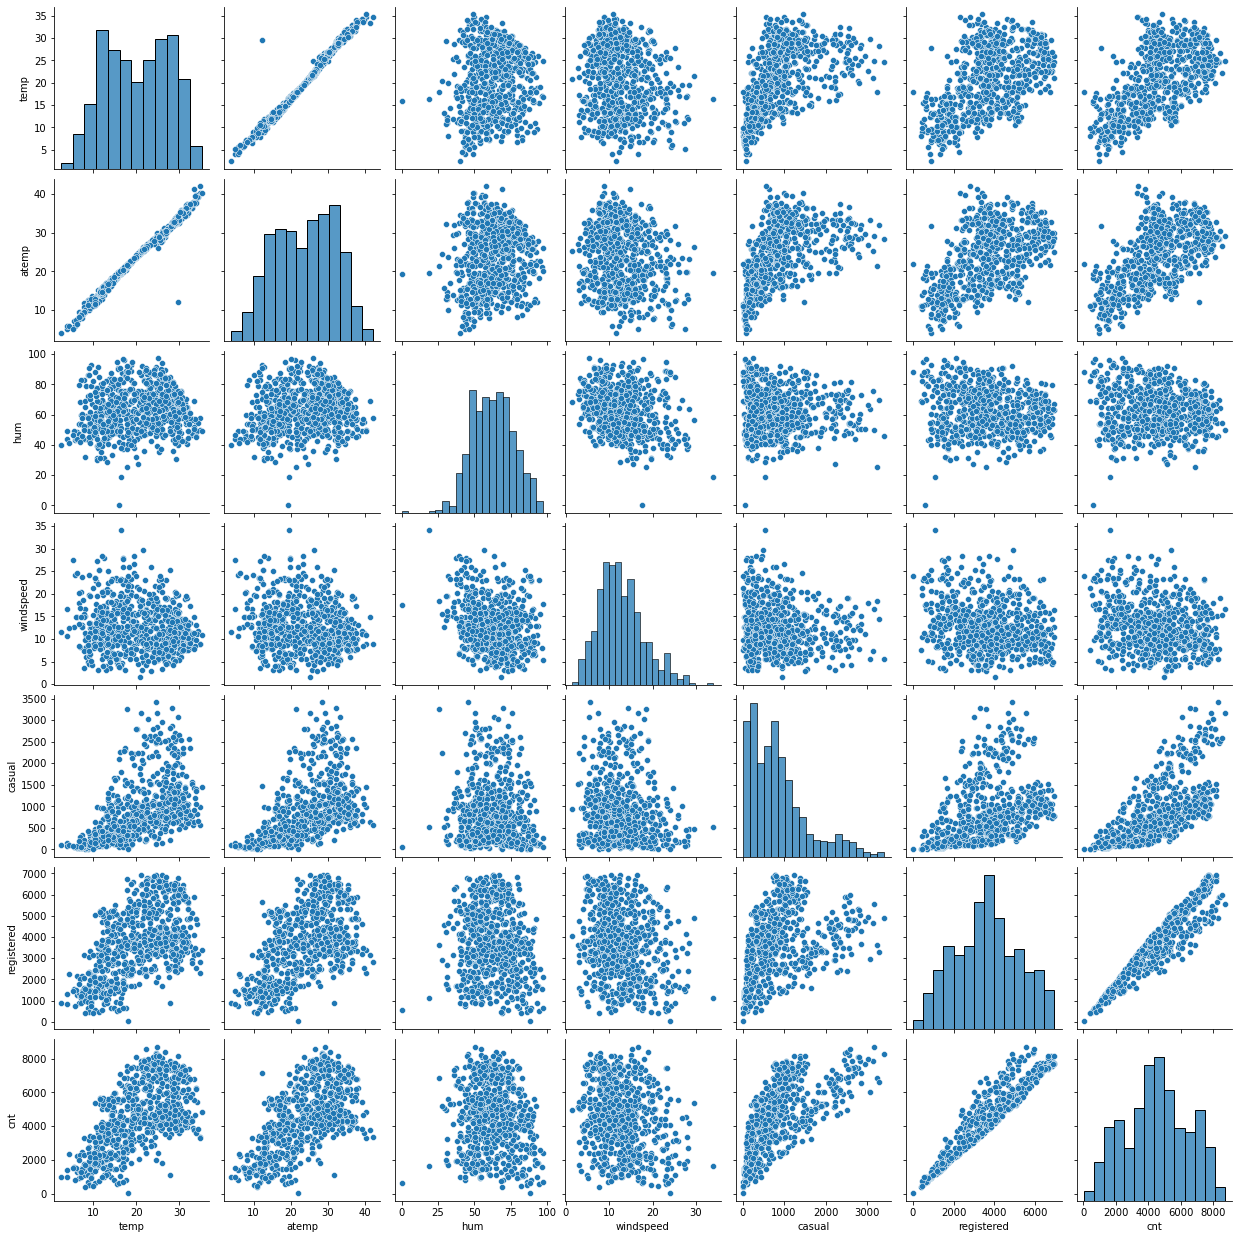

In [32]:
sns.pairplot(data = bike_new, vars = ['temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'])

Conclusion :  We can conclude that a linear_model can be consisered. Because there are some
    Independent variable such as temp. atemp, registered are showing some linearity, which is a positive correlation 
    with the target variable cnt

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

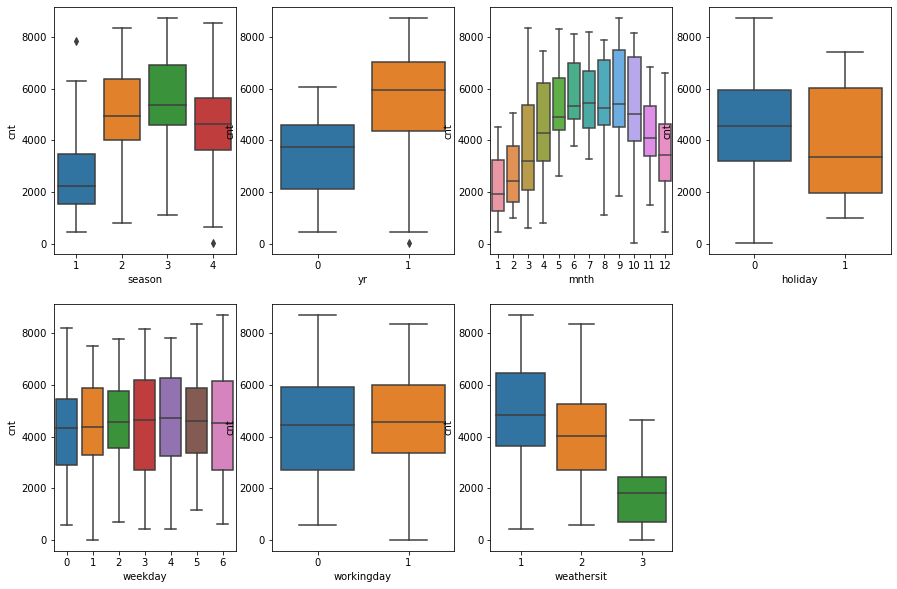

In [44]:
plt.figure(figsize = (15,10))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_new)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_new)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_new)

Inference - 1. Most of the boxplots which basically realtes with cnt are very much properly distributed
2. For Season  - For Season 3 the demand was high
3. Year  - 1: which represent 2019 has the highest count of users
4. Month - August, Sept, Oct the demands are more compare to other months
5. Waethersit - The Count of users is reducing gradually

### Step  - 3 Data Preparartion

In [48]:
### Mapping the categorical values to their respective string values
import calendar
bike_new['mnth'] = bike_new['mnth'].apply(lambda x :calendar.month_abbr[x])

<ipython-input-48-070a22c140c6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_new['mnth'] = bike_new['mnth'].apply(lambda x :calendar.month_abbr[x])


In [52]:
#### Mapping the Seasons also
#1 -  Spring, 2 - Summer , 3  - Autumn , 4 - Winter

bike_new.season = bike_new.season.map({1: 'spring', 2: 'Summer', 3 : 'Autumn', 4 :'Winter'})

C:\Users\proyas.bose\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [55]:
### Weather - 1 - Clear, 2 - Mist& Cloudy, 3 - LightSnow and rain
bike_new.weathersit = bike_new.weathersit.map({1: 'Clear', 2: 'Mist&Cloudy', 3 : 'LightSnow&Rain'})

C:\Users\proyas.bose\Anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [56]:
bike_new.weekday = bike_new.weekday.map({0: 'Sunday', 1: 'Monday', 2 : 'Tuesday', 3: 'Wednesday', 4: 'Thursday',5 :'Friday',6:'Saturday'})

In [57]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [58]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    int64  
 12  registered  730 non-null    int64  
 13  cnt         730 non-null    int64  
dtypes: float64(4), int64(6), object(4)
memory usage: 101.7+ KB


In [59]:
#### To Create and encode this categorical variable
### Create Dummy Variables - month, weekday, season, weathersit

dummy = bike_new[['season','weekday','weathersit','mnth']]
dummy.head()

,season,weekday,weathersit,mnth
0,spring,Saturday,Mist&Cloudy,Jan
1,spring,Sunday,Mist&Cloudy,Jan
2,spring,Monday,Clear,Jan
3,spring,Tuesday,Clear,Jan
4,spring,Wednesday,Clear,Jan


In [60]:
#### Dummies
#### Encoding Function which is called as One hot Encoder
dummy = pd.get_dummies(dummy,drop_first= True)

In [61]:
dummy

,season_Summer,season_Winter,season_spring,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow&Rain,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
726,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
727,0,0,1,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
728,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [62]:
bike_new = pd.concat([bike_new,dummy],axis = 1)
bike_new

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,spring,0,Jan,0,Saturday,0,Mist&Cloudy,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sunday,0,Mist&Cloudy,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,spring,1,Dec,0,Thursday,1,Mist&Cloudy,10.420847,11.33210,65.2917,...,1,0,0,0,0,0,0,0,0,0
726,spring,1,Dec,0,Friday,1,Mist&Cloudy,10.386653,12.75230,59.0000,...,1,0,0,0,0,0,0,0,0,0
727,spring,1,Dec,0,Saturday,0,Mist&Cloudy,10.386653,12.12000,75.2917,...,1,0,0,0,0,0,0,0,0,0
728,spring,1,Dec,0,Sunday,0,Clear,10.489153,11.58500,48.3333,...,1,0,0,0,0,0,0,0,0,0


In [63]:
bike_new.drop(['season'],axis = 1,inplace = True)

In [64]:
bike_new.drop(['mnth'],axis = 1,inplace = True)

In [65]:
bike_new.drop(['weekday'],axis = 1,inplace = True)

In [66]:
bike_new.drop(['weathersit'],axis = 1,inplace = True)

In [67]:
bike_new.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,1,0,0,0,0,0,0,0


In [68]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   casual                     730 non-null    int64  
 8   registered                 730 non-null    int64  
 9   cnt                        730 non-null    int64  
 10  season_Summer              730 non-null    uint8  
 11  season_Winter              730 non-null    uint8  
 12  season_spring              730 non-null    uint8  
 13  weekday_Monday             730 non-null    uint8  

#### Step - 4 Splitting the Datasets into Train and Test 

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
### we have not segreggted X and Y for testing as of Now
train, test = train_test_split(bike_new, train_size= 0.7, test_size= 0.3,random_state= 1234)

In [71]:
train.shape, test.shape

((510, 32), (219, 32))

### Step 5  Rescaling the Features

In [72]:
#### Min_max Scaling
#### Standard Scaling (mean - 0 and std - 1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [73]:
vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']

In [74]:
#### Training datasets
train[vars] = scaler.fit_transform(train[vars])

<ipython-input-74-6ad34c16ade7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[vars] = scaler.fit_transform(train[vars])
C:\Users\proyas.bose\Anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [75]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
92,0,0,0,0.374428,0.377232,0.494633,0.329480,0.482799,0.181011,0.353842,...,0,0,0,0,0,0,0,0,0,0
498,1,0,1,0.633514,0.607852,0.813653,0.392314,0.097912,0.319296,0.302863,...,0,0,0,0,0,0,1,0,0,0
602,1,0,0,0.739806,0.669971,0.871618,0.425641,0.433402,0.513936,0.605726,...,0,0,0,0,0,0,0,0,0,0
693,1,0,0,0.198382,0.213924,0.482610,0.264102,0.088209,0.260184,0.250251,...,0,0,0,0,0,0,0,1,0,0
67,0,0,1,0.264814,0.253038,0.799055,0.407689,0.053514,0.196631,0.183325,...,0,0,0,0,0,1,0,0,0,0


In [77]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt,...,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.519608,0.027451,0.680392,0.530411,0.506246,0.646326,0.348101,0.251313,0.498109,0.514989,...,0.068627,0.090196,0.084314,0.082353,0.072549,0.080392,0.084314,0.092157,0.076471,0.090196
std,0.500106,0.163554,0.466782,0.242079,0.218141,0.147297,0.157076,0.207677,0.240433,0.245049,...,0.253068,0.286744,0.278131,0.275172,0.259649,0.272166,0.278131,0.289531,0.266010,0.286744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.326818,0.325340,0.538106,0.232053,0.090856,0.319487,0.348506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.519472,0.507425,0.644053,0.328848,0.205381,0.502603,0.511929,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.742851,0.687382,0.755904,0.438134,0.331741,0.677450,0.707810,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

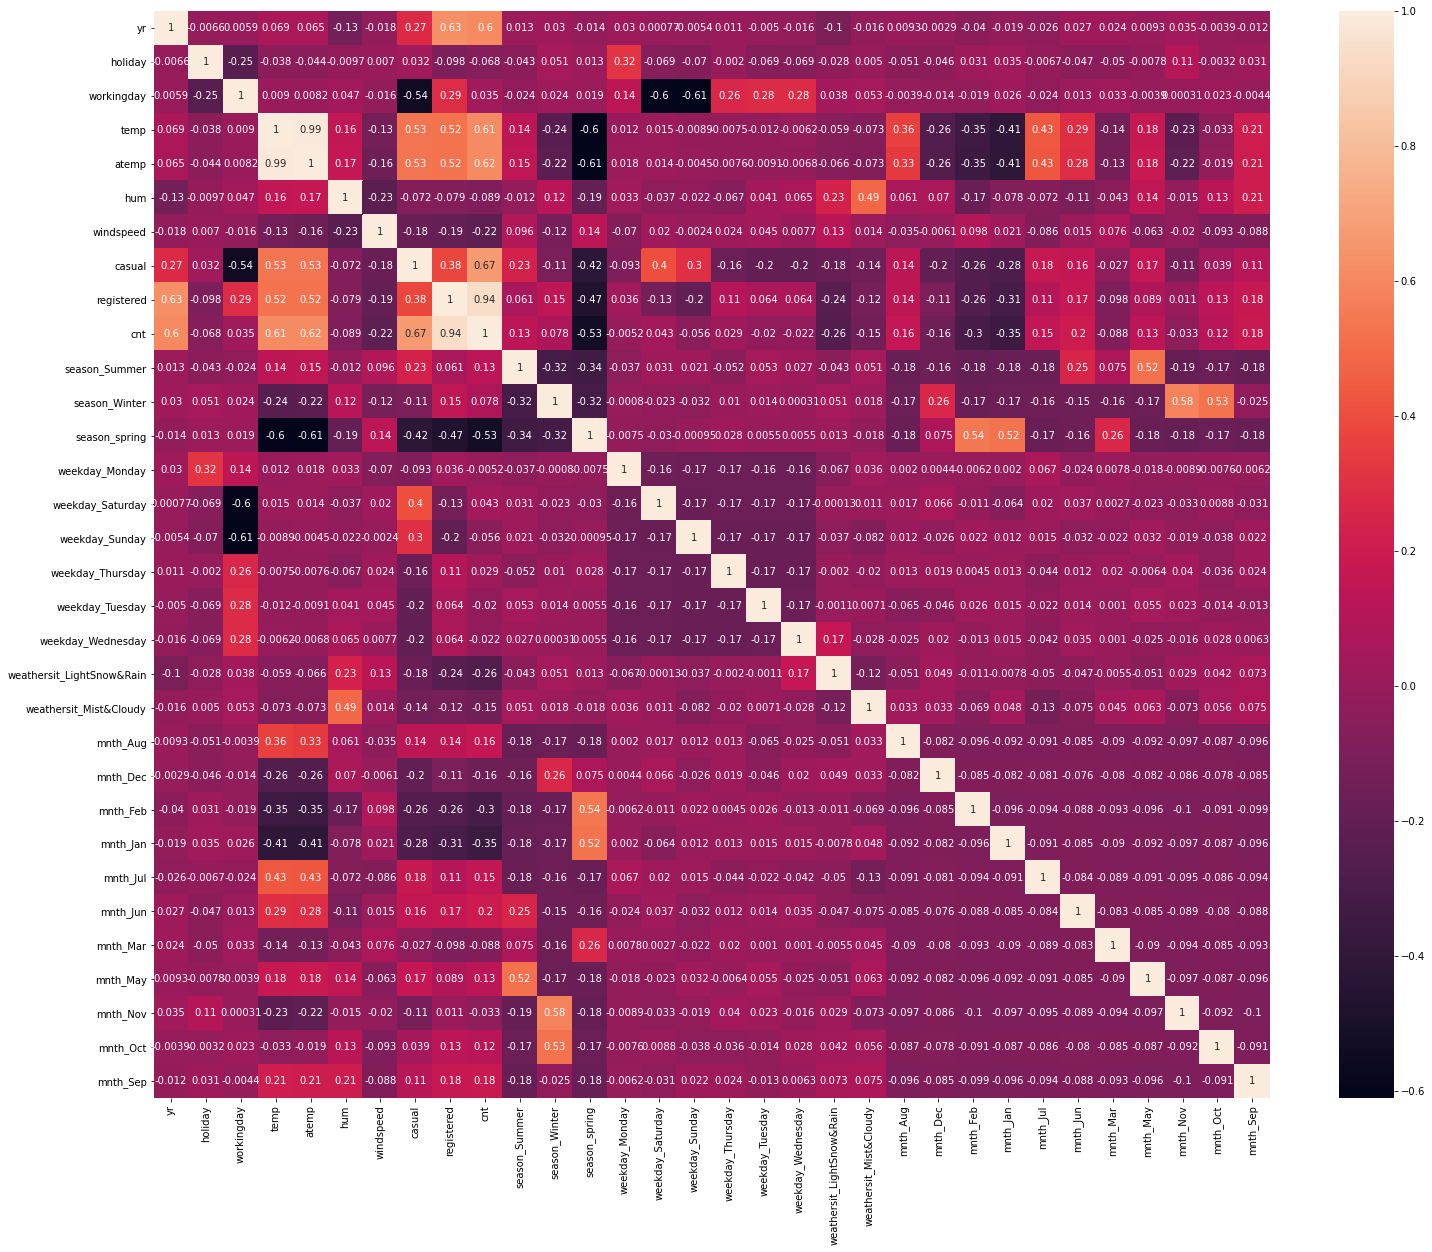

In [79]:
#### Correlation
plt.figure(figsize=(25,20))
sns.heatmap(train.corr(),annot = True)

Inference - yr, temp, atemp, registered are highly correlated values, as most of variableas is not correlated 
so we dont find significant output from this correlation, hence we will utilise all the variables

In [80]:
y_train  = train.pop('cnt')
X_train = train

In [84]:
y_train.shape, X_train.shape

((510,), (510, 31))

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lm = LinearRegression()

In [88]:
model = lm.fit(X_train,y_train)

In [91]:
model.coef_

array([-7.87189560e-17,  4.03986411e-16,  5.72723156e-17, -4.79494034e-16,
        1.48841681e-16,  6.11243149e-17,  7.27145327e-17,  4.27046710e-01,
        8.19939729e-01,  1.31031491e-16,  5.20334544e-17,  1.58261525e-16,
       -8.55409081e-17,  1.09997441e-16,  4.31848203e-17, -4.26085337e-17,
        3.43294684e-17, -5.17200131e-18,  1.44180837e-16,  4.88592585e-17,
       -2.39287444e-17, -1.37218867e-17, -4.27403828e-17, -6.07767876e-17,
       -5.76772277e-17, -1.63449591e-16, -9.84634866e-17, -3.69977383e-17,
        6.57734952e-17, -1.61285335e-17, -7.48238921e-17])

In [89]:
model.score(X_train,y_train)  #### 100 % Accuracy

1.0

In [ ]:
#### There is problem you will find in Overfitting and Underfitting of Model
Overfiting - When your train datasets gets good Accuracy and your test_data is also getting 100% Acc
Underfitting - When your train data gets good Accuracy but your test data fails miserably , underfitting

In [90]:
#### Feature Selection Method which is called RFE-  Recurrsive Feature Elimination
from sklearn.feature_selection import RFE

In [92]:
rfe = RFE(lm,15)

C:\Users\proyas.bose\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=15 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [93]:
rfe = rfe.fit(X_train,y_train)

In [95]:
rfe.ranking_

array([14,  6, 10,  1,  1, 16,  1,  1,  1,  1, 12,  1,  4,  1, 13,  5, 11,
       17,  1,  1,  7, 15,  8,  1,  2,  1,  1,  1,  9,  1,  3])

In [97]:
list(zip(X_train.columns,rfe.ranking_))

[('yr', 14),
 ('holiday', 6),
 ('workingday', 10),
 ('temp', 1),
 ('atemp', 1),
 ('hum', 16),
 ('windspeed', 1),
 ('casual', 1),
 ('registered', 1),
 ('season_Summer', 1),
 ('season_Winter', 12),
 ('season_spring', 1),
 ('weekday_Monday', 4),
 ('weekday_Saturday', 1),
 ('weekday_Sunday', 13),
 ('weekday_Thursday', 5),
 ('weekday_Tuesday', 11),
 ('weekday_Wednesday', 17),
 ('weathersit_LightSnow&Rain', 1),
 ('weathersit_Mist&Cloudy', 1),
 ('mnth_Aug', 7),
 ('mnth_Dec', 15),
 ('mnth_Feb', 8),
 ('mnth_Jan', 1),
 ('mnth_Jul', 2),
 ('mnth_Jun', 1),
 ('mnth_Mar', 1),
 ('mnth_May', 1),
 ('mnth_Nov', 9),
 ('mnth_Oct', 1),
 ('mnth_Sep', 3)]

In [99]:
y_test  = test.pop('cnt')
X_test = test

In [100]:
pred = model.predict(X_test)

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(y_test,pred)

0.5620113632210741

In [ ]:
#### Dowmlaod  - Pycharm #### IDE
WE develop ML Applications and we will see how it works on Server
